In [133]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import math
import numpy as np
import matplotlib.style as mplstyle
mplstyle.use('fast')

In [135]:
fin = mesh.Mesh.from_file('Fin #2.stl')

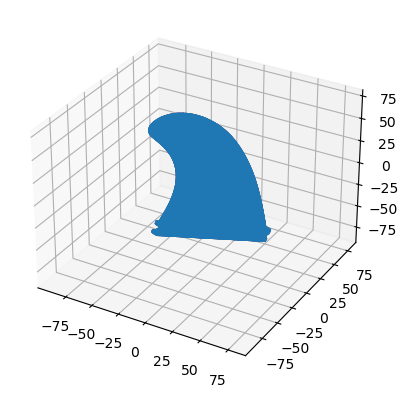

In [134]:
# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(fin.vectors))

# Auto scale to the mesh size
scale = fin.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [24]:
fin = mesh.Mesh.from_file('Fin #2.stl')

cog = fin.get_mass_properties()[1]
print(cog)
stl_shape = fin.vectors.shape
print(stl_shape)
cog_vector = np.full((stl_shape), cog)


print(fin.vectors)
print(fin.points)
fin.vectors = fin.vectors - cog_vector
print("\n change \n")
print(fin.vectors)
print(fin.points)

[ 10.82464705   1.15646128 417.24286416]
(1946554, 3, 3)
[[[-15.921451  -38.680214  372.12125  ]
  [-15.797986  -38.678024  372.08932  ]
  [-15.803666  -38.779305  372.1305   ]]

 [[-15.821668  -38.529087  372.05762  ]
  [-15.96924   -38.52952   372.09128  ]
  [-15.999004  -38.34636   372.07095  ]]

 [[-15.999004  -38.34636   372.07095  ]
  [-15.812764  -38.326885  372.02594  ]
  [-15.821668  -38.529087  372.05762  ]]

 ...

 [[ 16.87767    22.724632  431.55725  ]
  [ 16.983465   22.764446  431.64233  ]
  [ 17.012794   22.659359  431.57108  ]]

 [[ 53.5526     -7.754442  431.6635   ]
  [ 53.344093   -7.7043295 431.6405   ]
  [ 53.495583   -7.872722  431.57727  ]]

 [[ 53.495583   -7.872722  431.57727  ]
  [ 53.344093   -7.7043295 431.6405   ]
  [ 53.31761    -7.8312473 431.5571   ]]]
[[-15.921451  -38.680214  372.12125   ... -15.803666  -38.779305
  372.1305   ]
 [-15.821668  -38.529087  372.05762   ... -15.999004  -38.34636
  372.07095  ]
 [-15.999004  -38.34636   372.07095   ... -15.

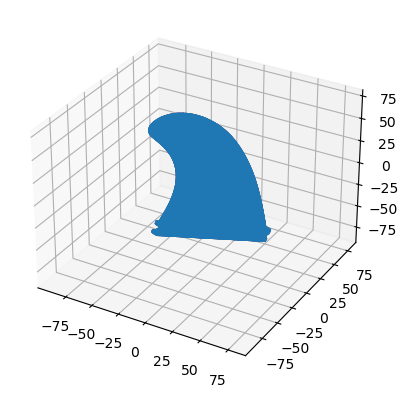

In [25]:
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(fin.vectors))

# Auto scale to the mesh size
scale = fin.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [27]:
fin.save('fin_cog.stl')

[[ 0.92849112 -0.37135459]
 [ 0.37135459  0.92849112]]


(-20.0, 20.0, -20.0, 20.0)

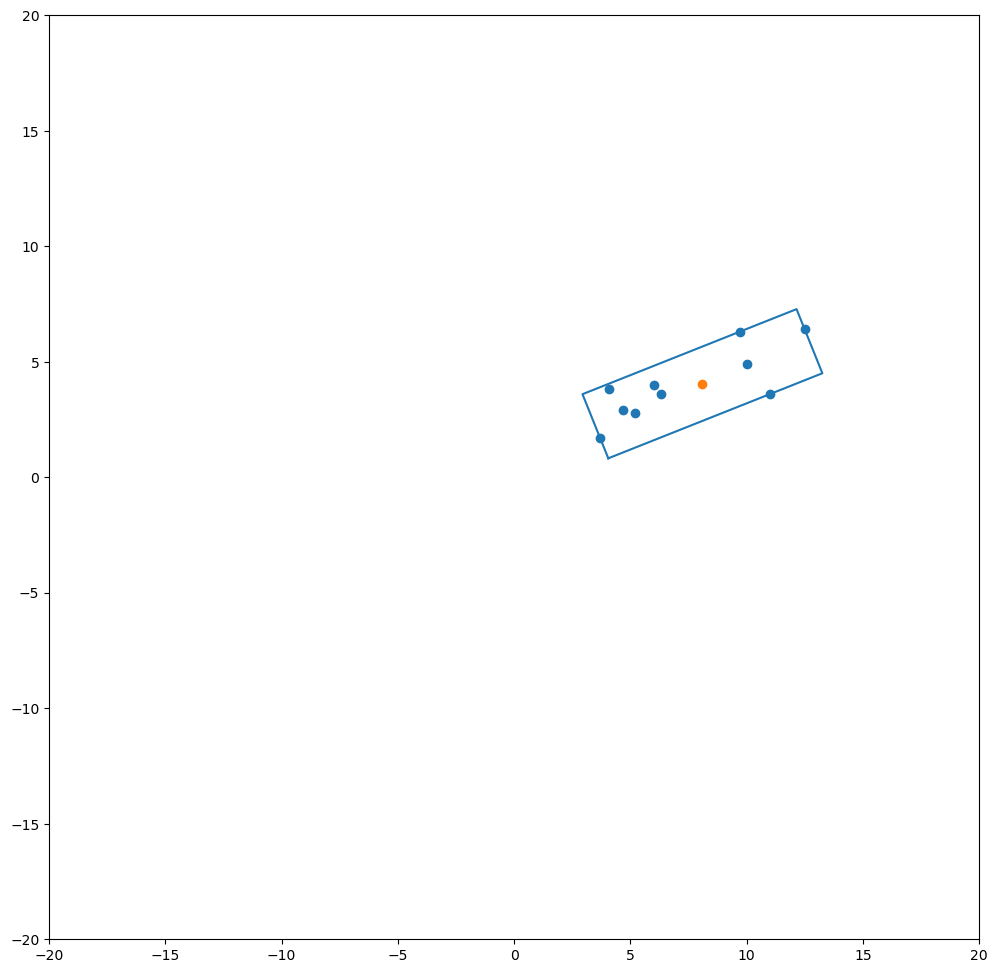

In [128]:
#Building a covariance matrix and bounding box in 2D
#pyplot figure initilization
points_figure = pyplot.figure(figsize=(12,12))
ax = points_figure.add_subplot(111)
#10 points, I am working off an example but in the next section I will try with random point cloud
point_cloud = [(3.7, 1.7), 
               (4.1, 3.8), 
               (4.7, 2.9), 
               (5.2, 2.8), 
               (6.0, 4.0), 
               (6.3, 3.6), 
               (9.7, 6.3), 
               (10.0, 4.9), 
               (11.0, 3.6), 
               (12.5, 6.4)]
#There is a more efficient way to do this but this plots the points
x = []
y = []
for i in range(len(point_cloud)):
    x.append(point_cloud[i][0])
    y.append(point_cloud[i][1])
ax.scatter(x,y)


#the first line stacks the points in a different format as a numpy array
#np.cov finds the covariance matrix of the array, the covariance matrix shows the variance between different values of
#the same variable and the variance between values of different variables
#eigen vectors and values can be retrieved from the covariance matrix, these eigenvectors are used to find the principle axis
#of the bounding box
cov_mat = np.stack((x, y), axis = 0)
cov = np.cov(cov_mat)
eigvalues, eigvectors = np.linalg.eig(cov)
print(eigvectors)
teigvect = np.transpose(eigvectors)
#by dotting the original point cloud with the eigenvectors we can allign all of the points in the cloud with either the x and y
#axis, which is used to get the minimum and maximum values of the cloud
point_cloud_rot = np.dot(point_cloud, np.linalg.inv(teigvect))

min = np.min(point_cloud_rot, axis =0)
max = np.max(point_cloud_rot, axis= 0)

diff = (max-min)*0.5
center = min + diff

#From here I lowkey just copied/pasted the work from a stack overflow
#https://stackoverflow.com/questions/32892932/create-the-oriented-bounding-box-obb-with-python-and-numpy
#so I am not really sure what specifically is going on
corners = np.array([center+[-diff[0],-diff[1]],
                    center+[diff[0],-diff[1]],
                    center+[diff[0],diff[1]],
                    center+[-diff[0],diff[1]],
                    center+[-diff[0],-diff[1]]])

corners = np.dot(corners,teigvect)
center = np.dot(center,teigvect)

ax.scatter([center[0]],[center[1]])    
ax.plot(corners[:,0],corners[:,1],'-')

pyplot.axis((-20,20,-20,20))


[[ 2.57599789  3.23318783]
 [ 7.26197776 11.97220398]
 [ 4.62717644 13.38502045]
 [-0.05880343  4.6460043 ]
 [ 2.57599789  3.23318783]]
[[ 1.31483084  3.91924592]
 [ 2.72929199 13.73393441]
 [-0.22982306 14.16039249]
 [-1.64428421  4.345704  ]
 [ 1.31483084  3.91924592]]


(-20.0, 20.0, -20.0, 20.0)

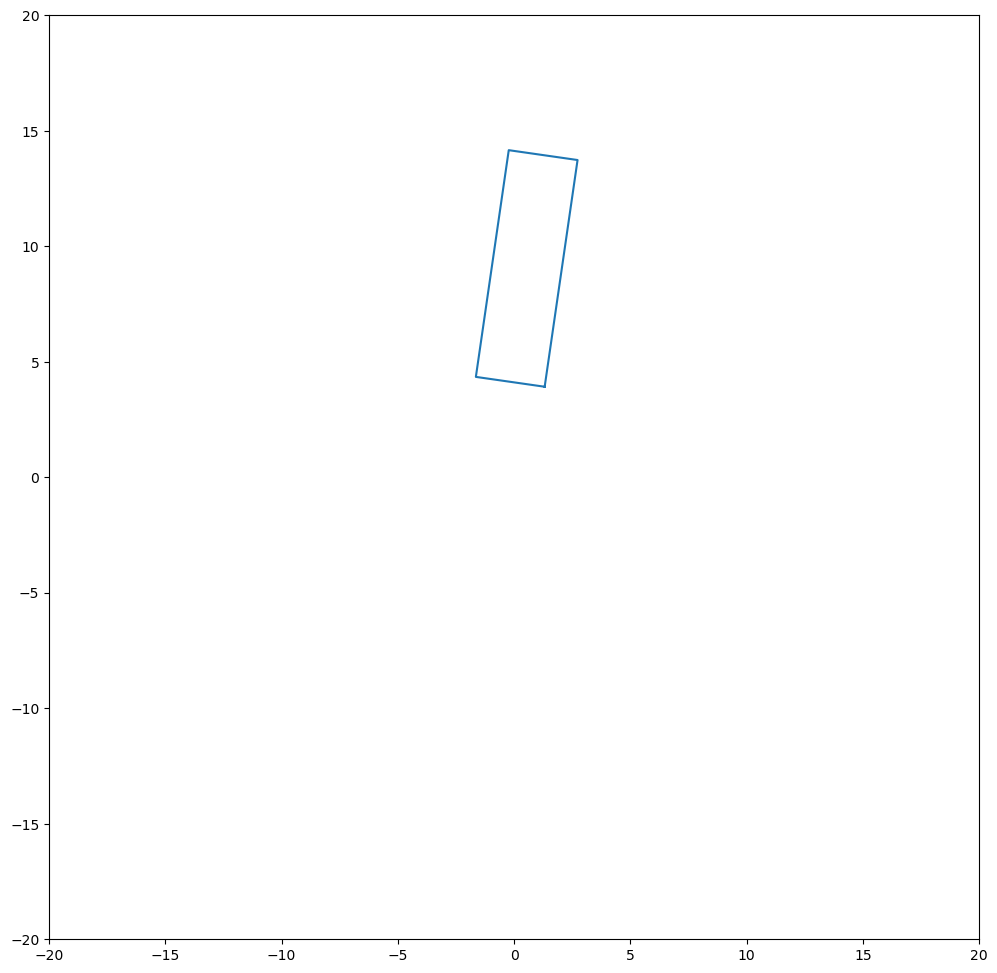

In [131]:
# I want to try and rotate the box by like 20 degrees. I will do this using a rotation matrix
theta = math.radians(20)
R = [[math.cos(theta),-math.sin(theta)],
    [math.sin(theta), math.cos(theta)]]
print(corners)
for i in range(len(corners)):
    corners[i] = np.matmul(R,corners[i])
print(corners)

points_figure = pyplot.figure(figsize=(12,12))
ax = points_figure.add_subplot(111)
ax.plot(corners[:,0],corners[:,1],'-')
pyplot.axis((-20,20,-20,20))